

## Выполнение разведочного анализа данных EDA. Проверка гипотез


Цель — спрогнозировать, когда представитель службы поддержки позвонит клиенту, подпишется он на банковский срочный вклад или нет?

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# увеличим дефолтный размер графиков
from pylab import rcParams

rcParams["figure.figsize"] = 6, 4
sns.set_style("whitegrid", {'axes.grid' : True})

### Подключение данных

In [2]:
df = pd.read_csv('bank.csv', sep=';')
df.head(1)

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Нет


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             41188 non-null  int64  
 1   Работа                              41188 non-null  object 
 2   Семейный статус                     41188 non-null  object 
 3   Образование                         41188 non-null  object 
 4   Кредитный дефолт                    41188 non-null  object 
 5   Ипотека                             41188 non-null  object 
 6   Займ                                41188 non-null  object 
 7   Контакт                             41188 non-null  object 
 8   Месяц                               41188 non-null  object 
 9   День недели                         41188 non-null  object 
 10  Длительность                        41188 non-null  int64  
 11  Кампания                            41188

In [4]:
dict_pr=['Работа','Семейный статус','Образование','Кредитный дефолт','','','',]

In [5]:
# Провекрка на уникальность

df['Семейный статус'].unique()


array(['Не женат / не замужем', 'Женат / замужем', 'Разведен(-а)',
       'Неизвестно'], dtype=object)

In [6]:
# заменим значения Неизвестно на NAn
df=df.replace({
              'Работа':'Неизвестно',
               'Семейный статус':'Неизвестно',
                'Образование':'Неизвестно',
                'Кредитный дефолт':'Неизвестно',
                'Ипотека':'Неизвестно',
                'Займ':'Неизвестно',
                'День': 999,            
},np.NaN)
df.head()

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
2,39,Голубой воротничок,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,NaN,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да


In [7]:
df['Семейный статус'].unique()

array(['Не женат / не замужем', 'Женат / замужем', 'Разведен(-а)', nan],
      dtype=object)

In [8]:
df.isnull().mean()*100

Возраст                                0.000000
Работа                                 0.801204
Семейный статус                        0.194231
Образование                            4.202680
Кредитный дефолт                      20.872584
Ипотека                                2.403613
Займ                                   2.403613
Контакт                                0.000000
Месяц                                  0.000000
День недели                            0.000000
Длительность                           0.000000
Кампания                               0.000000
День                                  96.321744
Предыдущий контакт                     0.000000
Доходность                             0.000000
Колебание уровня безработицы           0.000000
Индекс потребительских цен             0.000000
Индекс потребительской уверенности     0.000000
Европейская межбанковская ставка       0.000000
Количество сотрудников в компании      0.000000
y                                      0

Анализ данных показал что в столбце 'День' пропущено 96% данных, а в столбце 'Кредитный дефолт' пропущено более 20% данных. Я исключаю их из общего рассмотрения

In [9]:
# удалим столбцы день и  кредитный дефолт
df=df.drop(columns=['День'])



In [10]:
df=df.drop(columns=['Кредитный дефолт'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             41188 non-null  int64  
 1   Работа                              40858 non-null  object 
 2   Семейный статус                     41108 non-null  object 
 3   Образование                         39457 non-null  object 
 4   Ипотека                             40198 non-null  object 
 5   Займ                                40198 non-null  object 
 6   Контакт                             41188 non-null  object 
 7   Месяц                               41188 non-null  object 
 8   День недели                         41188 non-null  object 
 9   Длительность                        41188 non-null  int64  
 10  Кампания                            41188 non-null  int64  
 11  Предыдущий контакт                  41188

In [9]:
df.isnull().mean()*100

Возраст                               0.000000
Работа                                0.801204
Семейный статус                       0.194231
Образование                           4.202680
Ипотека                               2.403613
Займ                                  2.403613
Контакт                               0.000000
Месяц                                 0.000000
День недели                           0.000000
Длительность                          0.000000
Кампания                              0.000000
Предыдущий контакт                    0.000000
Доходность                            0.000000
Колебание уровня безработицы          0.000000
Индекс потребительских цен            0.000000
Индекс потребительской уверенности    0.000000
Европейская межбанковская ставка      0.000000
Количество сотрудников в компании     0.000000
y                                     0.000000
dtype: float64

In [12]:
#замена нулевых значений методом медиан
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df["Работа"] = imputer.fit_transform(df["Работа"].values.reshape(-1,1))[:,0]
df["Семейный статус"] = imputer.fit_transform(df["Семейный статус"].values.reshape(-1,1))[:,0]
df["Образование"] = imputer.fit_transform(df["Образование"].values.reshape(-1,1))[:,0]
df["Ипотека"] = imputer.fit_transform(df["Ипотека"].values.reshape(-1,1))[:,0]
df["Займ"] = imputer.fit_transform(df["Займ"].values.reshape(-1,1))[:,0]

In [13]:
df.isnull().mean()*100

Возраст                               0.0
Работа                                0.0
Семейный статус                       0.0
Образование                           0.0
Ипотека                               0.0
Займ                                  0.0
Контакт                               0.0
Месяц                                 0.0
День недели                           0.0
Длительность                          0.0
Кампания                              0.0
Предыдущий контакт                    0.0
Доходность                            0.0
Колебание уровня безработицы          0.0
Индекс потребительских цен            0.0
Индекс потребительской уверенности    0.0
Европейская межбанковская ставка      0.0
Количество сотрудников в компании     0.0
y                                     0.0
dtype: float64

### EDA 

1. Каков средний возраст холостых/незамужних клиентов? Постройте boxplot
Ответ:средний возраст хлостых= 33

<AxesSubplot:title={'center':'Возраст'}, xlabel='Семейный статус'>

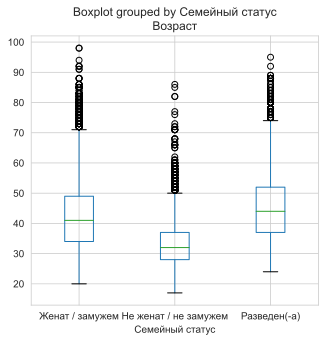

In [14]:
# Ваш код
group0=df['Семейный статус']=='Не женат / не замужем'
group1=df['Семейный статус']=='Женат / замужем'
group2=df['Семейный статус']=='Разведен(-а)'
variable=df['Возраст']
a1=variable[group0]
a=variable[group0].mean()
b=variable[group1].count()
c=variable[group2].count()
df.boxplot(column='Возраст',by='Семейный статус',figsize=(5,5))

In [14]:
print('средний возраст хлостых=', int(a))

средний возраст хлостых= 33


2. В какой день недели (признак **День недели**) чаще всего звонили клиентам, отказавшимся от депозита? Постройте столбчатую диаграмму.
Ответ: Понедельник


In [15]:
df_pivot3 = pd.pivot_table(df, columns='y', index='День недели', aggfunc='count',values='Длительность')
df_pivot3

y,Да,Нет
День недели,,
Вторник,953,7137
Понедельник,847,7667
Пятница,846,6981
Среда,949,7185
Четверг,1045,7578


<AxesSubplot:xlabel='День недели'>

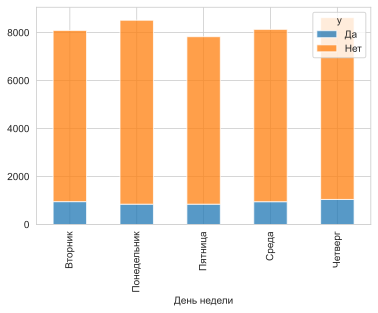

In [16]:
df_pivot3.plot(kind='bar', stacked=True, alpha=0.75)

3. Постройте график по признакам **Семейный статус** и **y**. Какие выводы можно сделать?
Ответ: В целом по всем группам преобладает отрицательный ответ. 
В частности семейные люди чаще отказывались от открытия депозита, что может быть связано с отсутствием свободных денежных средств или с невыгодностью условий открытия депозита

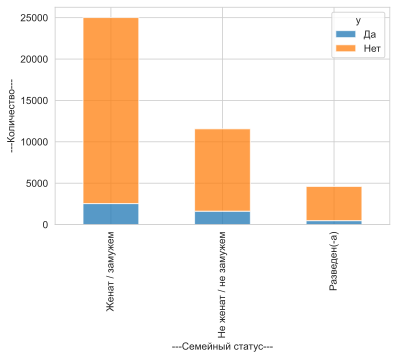

In [17]:
# Ваш код
df_pivot = pd.pivot_table(df, columns='y', index='Семейный статус', aggfunc='count',values='Возраст')
df_pivot.plot(kind='bar', stacked=True, alpha=0.75)
plt.ylabel('---Количество---')
plt.xlabel('---Семейный статус---')
plt.show()

In [90]:
df['Семейный статус'].unique()

array(['Не женат / не замужем', 'Женат / замужем', 'Разведен(-а)'],
      dtype=object)

4. Имеется ли связь между наличием кредита (**Кредитный дефолт**) у клиента и результатом y? Постройте график рассеивания.
Ответ: Связи между кредитным дефолтом и положительным решением по открытию депозита нет.

In [18]:
# Ваш код
df1 = pd.read_csv('bank.csv', sep=';')
df1=df1.replace({'Кредитный дефолт':'Неизвестно',         
},np.NaN)
imputer1 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df1["Кредитный дефолт"] = imputer1.fit_transform(df1["Кредитный дефолт"].values.reshape(-1,1))[:,0]
df1['Кредитный дефолт'].unique()
df1['y'].unique()
df_sh1 = df1.iloc[:10000][["Кредитный дефолт",'y']]#
#df_sh1.head(2)

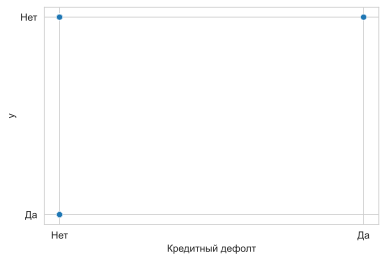

In [19]:
sns.scatterplot(data=df_sh1, x="Кредитный дефолт", y="y")
plt.show()

5. Визуализируйте информацию об уровне образования в зависимости от среднего возраста. Есть ли статистически значимая взаимосвязь между ними? Ответ:нет

In [41]:
df['Образование'].unique()

array(['Университетская степень', 'Базовое (9 классов)', 'Высшая школа',
       'Базовое (4 класса)', 'Профессиональный курс',
       'Базовое (6 классов)', 'Неграмотный'], dtype=object)

In [26]:
df_pivot1 = pd.pivot_table(df, columns='y', index='Образование', aggfunc='mean',values='Возраст')

In [27]:
df_pivot1

y,Да,Нет
Образование,,
Базовое (4 класса),58.221963,46.383138
Базовое (6 классов),40.292553,40.462928
Базовое (9 классов),38.942918,39.071249
Высшая школа,37.503395,38.058345
Неграмотный,51.750000,47.571429
Профессиональный курс,41.031933,39.958262
Университетская степень,39.373243,39.465019


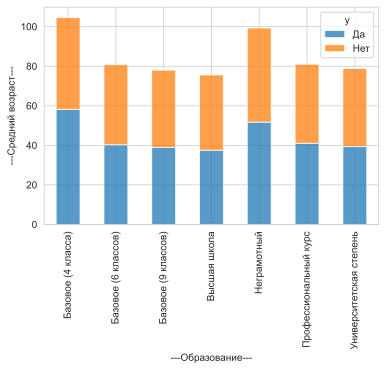

In [28]:
df_pivot1.plot(kind='bar', stacked=True, alpha=0.75)
plt.ylabel('---Средний возраст---')
plt.xlabel('---Образование---')
plt.show()

6. Что можно сказать о связи между длительностью контакта (признак **Длительность**) и возрастом клиента? Найдите коэффициент корреляции.
Ответ: между признаками длительность и возраст клиента существует крайне слабая связь, коэф кореляции= -0.000866

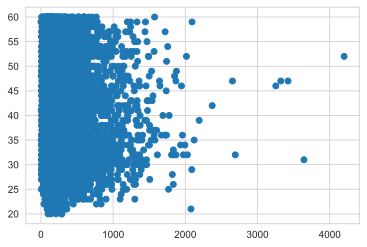

In [37]:
#d=df[['Длительность','Возраст']]
df_sh1 = df1.iloc[:10000][["Длительность",'Возраст']]#
plt.scatter(df_sh1["Длительность"],df_sh1['Возраст'])
plt.show()


In [141]:
cor_=d.corr()
cor_

,Длительность,Возраст
Длительность,1.000000,-0.000866
Возраст,-0.000866,1.000000


7. Как связаны признаки **Образование** и **Ипотека**?В среднем  люди вне зависимости от образования пользуются ипотекой, можно отметить, что оппоненты имеющие более низкое образование ипотекой пользуются чаще.

Text(0.5, 0, '---Образование---')

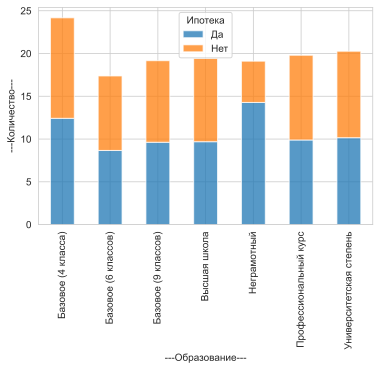

In [38]:
# Ваш код
df_pivot = pd.pivot_table(df, columns='Ипотека', index='Образование', aggfunc='std',values='Возраст')
df_pivot.plot(kind='bar', stacked=True, alpha=0.75)
plt.ylabel('---Количество---')
plt.xlabel('---Образование---')

8. Предложите свою гипотезу о данных и проверьте ее.
8а.В какой день недели были максимальные по длительности звонки?
Ответ: четверг

In [21]:
# Ваш код
df_pivot3 = pd.pivot_table(df, columns='y', index='День недели', aggfunc='count',values='Длительность')
df_pivot3

y,Да,Нет
День недели,,
Вторник,953,7137
Понедельник,847,7667
Пятница,846,6981
Среда,949,7185
Четверг,1045,7578


1045

<AxesSubplot:>

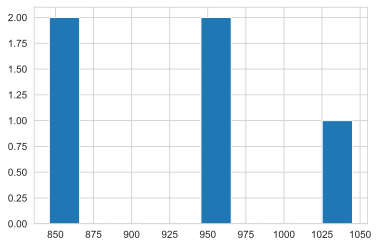

In [23]:
K.hist()

8б.При каком ответе продолжительность звонка больше? Ответ: При положительном ответе длительность звонка была больше

<AxesSubplot:title={'center':'Длительность'}, xlabel='y'>

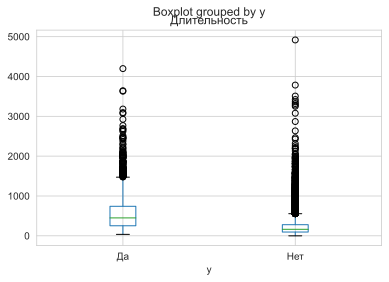

In [20]:
# Ваш код
df.boxplot(column='Длительность',by='y')